In [1]:
import torch
from torchvision import datasets
from torchvision import transforms
import matplotlib.pyplot as plt

from torch.utils.data import Dataset, DataLoader

from torchvision import transforms
import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from PIL import Image

/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Transforms images to a PyTorch Tensor
tensor_transform = transforms.Compose([
    transforms.ToTensor() , 
    transforms.Resize((64,64))
])
  
# Download the MNIST Dataset
# dataset =  dsets.FashionMNIST(root="./data2" ,train=False , transform=tensor_transform,download=True )    #  datasets.MNIST

class Data(Dataset):
    def __init__(self,transform):
        super().__init__()
        self.image = Image.open("./Data-oct.jpeg")
        self.transform = transform
    def __len__(self):
        return 1

    def __getitem__(self , index):
        
        return self.transform(self.image)

dataset = Data(transform = tensor_transform)
# dataset_val = dsets.FashionMNIST(root="./data" , train=False  , transform=composed , download=False)
# DataLoader is used to load the dataset 
# for training
loader = DataLoader(dataset , batch_size=1 , shuffle = True)

In [3]:
sample = next(iter(loader))
sample.shape

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


torch.Size([1, 1, 64, 64])

In [4]:
flat = nn.Flatten()(sample)
num_sample = flat.shape[1]
flat.shape , num_sample

(torch.Size([1, 4096]), 4096)

In [7]:
# Creating a PyTorch class
# 28*28 ==> 9 ==> 28*28
class AE(torch.nn.Module):
    def __init__(self):
        super().__init__()
          
        ''' Todo: Build a linear encoder with Linear
         layer followed by Relu activation function
         784 ==> 9 '''
        # Encoder
        self.encoder = nn.Sequential(
        # nn.Flatten(),
        # nn.Conv1d(1,3,2),
        nn.Linear(num_sample , int(num_sample/2)),
        nn.ReLU(),
        nn.Linear(int(num_sample/2) , int(num_sample/4)),
        nn.ReLU(),
        nn.Linear(int(num_sample/4) , int(num_sample/8)),
        nn.ReLU(),
        nn.Linear(int(num_sample/8) , int(num_sample/16)),
        nn.Sigmoid(),
        )
          
        ''' Todo: Build a linear decoder with Linear
         layer followed by Relu activation function
         The Sigmoid activation function
         outputs the value between 0 and 1
         9 ==> 784 '''
        self.decoder = nn.Sequential(
        # nn.ConvTranspose1d(3,1,2),
        nn.Linear(int(num_sample/16) , int(num_sample/8)),
        nn.ReLU(),
        nn.Linear(int(num_sample/8) , int(num_sample/4)),
        nn.ReLU(),
        nn.Linear(int(num_sample/4) , int(num_sample/2)),
        nn.ReLU(),
        nn.Linear(int(num_sample/2) , int(num_sample)),
        nn.Sigmoid()
        
        )
  
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        # reshape = decoded.view(28,28)
        return decoded

In [8]:

''' Todo: Initialaize model '''
model = AE().to("cuda")
  
''' Todo: Validation using MSE Loss function '''
loss_function = nn.MSELoss()
  
''' Todo: Use an Adam Optimizer'''
optimizer = torch.optim.Adam(model.parameters() , 0.0001)

In [10]:
epochs = 20
outputs = []
losses = []
for epoch in range(epochs):
    for (image) in loader:
        
      ''' Todo: Reshaping the image to (-1, 784) '''
      image  = image.to("cuda")
      image = nn.Flatten()(image)
        
      # Output of Autoencoder
      reconstructed = model(image)
        
      ''' Todo: Calculate the loss function '''
      loss = loss_function(reconstructed , image)
        
      # The gradients are set to zero,
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      # the the gradient is computed and stored.
      # .step() performs parameter update
      
        
      # Storing the losses in a list for plotting
      losses.append(loss.detach().cpu())
    outputs.append((epochs, image, reconstructed))
  


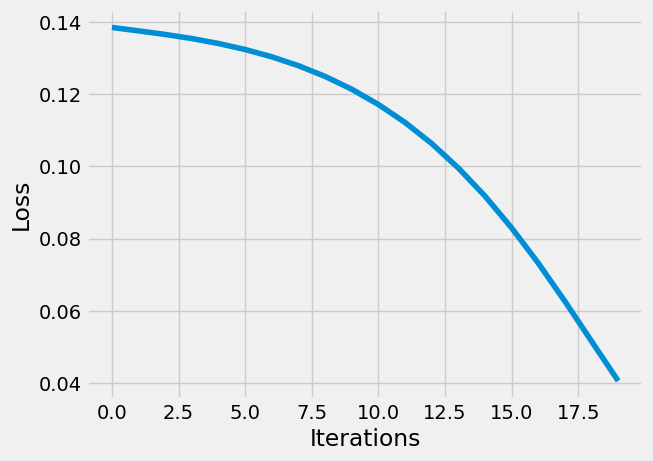

In [11]:
# Defining the Plot Style
plt.style.use('fivethirtyeight')
plt.xlabel('Iterations')
plt.ylabel('Loss')
  
''' Todo: Plot the last 100 values '''
plt.plot(range(0,len(losses)) , losses)

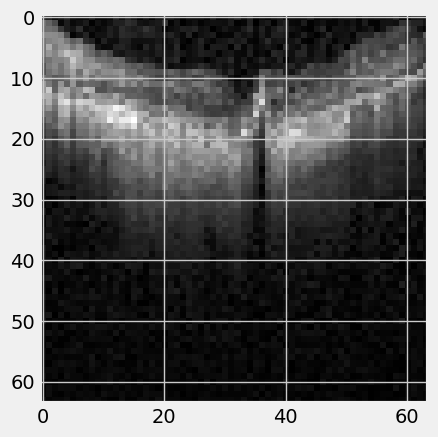

In [17]:
# Plot the first input image array
for i, item in enumerate(image):
    
  # Reshape the array for plotting
  item = item.reshape(-1, 64, 64)
  plt.imshow(item[0].detach().cpu() , cmap="gray")


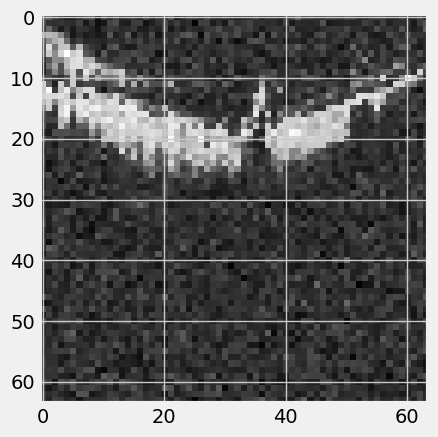

In [16]:
''' Todo: Plot the first reconstructed input image array '''  
for i, item in enumerate(reconstructed):
    
  # Reshape the array for plotting
  item = item.reshape(-1, 64, 64)
  plt.imshow(item[0].detach().cpu() , cmap="gray")
